<a href="https://colab.research.google.com/github/LucasBezerraSantos/Projetos_Pessoias/blob/master/Livro_Machine_Learning_Matt_Harrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lucas Bezerra Santos**

Este notebook está organizado com o objetivo de reproduzir alguns trechos do livro "Machine Learning - Guia de Referência Rápida".

### Bibliotécas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import ( ensemble, preprocessing, tree )
from sklearn.metrics import ( auc, confusion_matrix, roc_auc_score, roc_curve, precision_score, accuracy_score )
from sklearn.model_selection import ( train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV )
from yellowbrick.classifier import ( ConfusionMatrix, ROCAUC )
from yellowbrick.model_selection import LearningCurve

### Leitura e tratamento de Dados

In [2]:
titanic_df = pd.read_csv('/content/sample_data/train_titanic.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

A biblioteca pandas-profiling inclui um relatório de perfil. É possível gerar esse relatório em um notebook, ele sintetizará os tipos das colunas e permitirá que você visualize os detalhes das estatísticas dos quantis, as estatísticas descritivas, um histograma, os valores comuns e os valores extremos.

In [3]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=49b5e571b8dbdfa03daad168a92507ef2af81050e368a8

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(titanic_df)

<ipython-input-4-8884f3644be1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Padronização de Dados

De posse dos dados devemos garantir que estejam em um formato que possamos usar para criar um modelo, a maioria dos modelos do scikit-learn exige que os nossos atributos sejam numéricos. Além disso, muitos modelos falham caso recebam valores ausentes, alguns modelos terão melhor desempenho se os dados estiverem padronizados.

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.drop(columns=['Name','Ticket','Cabin'], inplace=True)

In [7]:
titanic_df = pd.get_dummies(titanic_df, drop_first=True)
titanic_df.head(3)

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1

In [8]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42 )

mediana = X_train.median()
X_train = X_train.fillna(mediana)
X_test = X_test.fillna(mediana)

**Normalização**

Pré-processar os dados ajudará muitos modelos a terem melhor desempenho depois, particularmente aqueles que dependem de uma métrica de distância para determinar a semelhança.

In [10]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns= X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns= X.columns)

# após a mudança de escala os dados foram convertidos novamente em dataframe

In [11]:
X_test.head(3)

PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0     1.013914  0.803267 -0.077252  0.348687  0.759763 -0.325478  0.720772   
1    -0.025331 -0.417307  0.153056 -0.474161 -0.479327 -0.418557  0.720772   
2     1.518140  0.803267 -0.691408 -0.474161 -0.479327 -0.469061  0.720772   

   Embarked_Q  Embarked_S  
0   -0.311177   -1.659220  
1   -0.311177    0.602693  
2   -0.311177    0.602693

### Modelagem

A modelagem envolve a criação de um modelo matemático ou estatístico que representa a relação entre variáveis em um conjunto de dados. É uma etapa crítica no processo de análise de dados, pois o modelo é usado para entender e interpretar os dados, bem como para fazer previsões ou inferências. A modelagem pode envolver a escolha de técnicas estatísticas, matemáticas ou de aprendizado de máquina para criar um modelo que represente a relação entre as variáveis de interesse. A validação do modelo é uma parte importante da modelagem, que envolve a avaliação do desempenho do modelo em dados de teste para verificar sua precisão e confiabilidade.

Avaliando com Dummy Classifier | Baseline

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
dummy = DummyClassifier()

dummy.fit(
     X_train, y_train 
)
resultado = dummy.score( 
    X_test, y_test 
)
print(f'Score {resultado:.4f} %')

Score 0.5858 %


O código a seguir testa diferentes famílias de algoritmos. O teorema “no free lunch” afirma que nenhum algoritmo tem bom desempenho em todos os dados, no entanto para um número finito de dados pode haver um algoritmo que tenha um bom desempenho neste conjunto.

Em nosso caso, usaremos algumas famílias diferentes e compararemos a pontuação AUC e o desvio-padrão usando uma validação cruzada k fold. Um algoritmo que tem a uma pontuação média um pouco menor, porém o desvio padrão menor poderia ser uma melhor opção. Como estamos usando uma validação cruzada K-fold, alimentaremos todos os modelos com X e y


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [15]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [16]:
for modelo in [
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    SVC,
    RandomForestClassifier,
    GaussianNB,
    XGBClassifier  
]:

  cls = modelo()  # instancia o modelo dentro do laço

  kfold = KFold(n_splits=10, random_state=42, shuffle=True) # técnica de combinação e embaralhamento
  
  s = cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold) # validações cruzadas com diferentes folds

  print(f"{modelo.__name__:22} AUC: {s.mean():.3f} STD {s.std():.3f}")


LogisticRegression     AUC: 0.847 STD 0.059
DecisionTreeClassifier AUC: 0.753 STD 0.039
KNeighborsClassifier   AUC: 0.834 STD 0.059
SVC                    AUC: 0.853 STD 0.064
RandomForestClassifier AUC: 0.870 STD 0.057
GaussianNB             AUC: 0.827 STD 0.066
XGBClassifier          AUC: 0.845 STD 0.058


In [17]:
!pip install six
!pip install --upgrade mlxtend

from mlxtend.classifier import StackingClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


A função Stacking é uma técnica de aprendizado de máquina que combina múltiplos modelos de aprendizado de máquina para melhorar a performance de predição. Essa técnica consiste em treinar diversos modelos de aprendizado de máquina (por exemplo, Regressão Logística, Árvore de Decisão, SVM, Random Forest) em um conjunto de dados de treinamento, e depois usar esses modelos para prever a saída em um conjunto de dados de validação.

In [18]:
# list comprehension para instanciar cada modelo na lista

clfs = [
    x()
    for x in [
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    SVC,
    RandomForestClassifier,
    GaussianNB ]
]

stack = StackingClassifier( classifiers= clfs, meta_classifier= LogisticRegression() ) # técnica de classificação

kfold = KFold( n_splits=10, random_state=42, shuffle=True ) # combinação e embaralhamento

s = cross_val_score( stack, X, y, scoring="roc_auc", cv=kfold ) # validação cruzada com diferentes folds

print(f"{stack.__class__.__name__} AUC: {s.mean():.3f} STD {s.std():.3f}")


StackingClassifier AUC: 0.837 STD 0.054


O hiperparâmetro meta_classifier do StackingClassifier é usado para especificar o estimador que será usado como meta-classificador para fazer a previsão final a partir das saídas dos classificadores base. Em outras palavras, os classificadores base geram as previsões que são usadas como entrada para o meta-classificador, que combina essas previsões para gerar a previsão final. O valor desse hiperparâmetro deve ser um estimador do tipo classificador, como LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, etc.

O meta-classificador é treinado com as saídas dos classificadores base no conjunto de treinamento, e é usado para prever as classes do conjunto de teste. A escolha do meta-classificador e seus hiperparâmetros pode afetar significativamente o desempenho do modelo de stacking. Portanto, é importante ajustá-lo cuidadosamente para obter os melhores resultados possíveis.

### Otimização de hiperparametros

O Código abaixo retorna a métrica acurácia de quantos valores foram previstos corretamente após o fit no treino.

In [19]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8134328358208955

In [20]:
precision_score(
    y_test, rf.predict(X_test)
)

0.8505747126436781

A função ZIP cria uma lista de tuplas entre colunas e feature importances. A partir dessa lista o laço itera e reordena com sorted, aplicando a função lambda para pegar o segundo elemento da tupla e colocar de modo decrescente. Por fim, fatia os cinco primeiros elementos e mostra o nome da coluna e sua importância para o aprendizado de máquina.

In [21]:
for col, val in sorted(
    zip(
        X_train.columns,
        rf.feature_importances_
    ),
    key=lambda X: X[1],
    reverse=True,
)[:5]:
    print(f"{col:12}{val:10.3f}")

Sex_male         0.244
Fare             0.201
PassengerId      0.191
Age              0.166
Pclass           0.083


**GridSearch**

O GridSearchCV é uma ferramenta do Scikit-learn (sklearn) que permite selecionar os melhores hiperparâmetros para um modelo de aprendizado de máquina. A busca em grid (Grid Search) é uma abordagem exaustiva que testa todas as combinações possíveis de valores de hiperparâmetros fornecidos como entrada para determinar a combinação que produz a melhor performance.

In [22]:
random_grid = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = GridSearchCV(
    random_grid, params, n_jobs=-1
).fit(
    X_train, y_train
)

print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [23]:
# Resultado do modelo com hiperparâmetros do gridsearch

random_best = ensemble.RandomForestClassifier(
    max_features=0.4, min_samples_leaf= 1, n_estimators= 200, random_state= 42
)
random_best.fit(X_train, y_train)

y_pred = random_best.predict(X_test)
roc_auc_score(y_test, y_pred)

0.791932059447983

### Visualizações

**Gráfico de aprendizado**

Esse gráfico mostra a evolução de aprendizado do algoritmo conforme os dados crescem. Se o aprendizado for bem significativo a partir da entrada de novos dados, pode valer a pena investir em mais coleta.

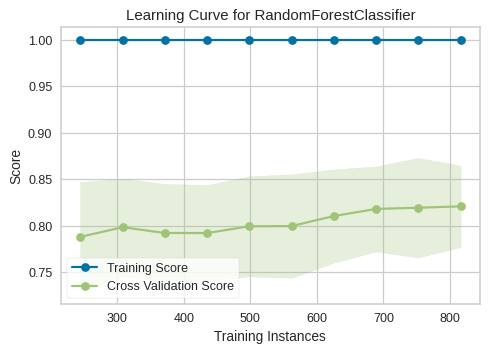

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 4), dpi=(90))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

lc_viz = LearningCurve(
    random_best,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X, y)
lc_viz.poof()

**Visualização de dados nulos**

In [25]:
orig_df = pd.read_csv('/content/sample_data/train_titanic.csv')

In [26]:
orig_df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

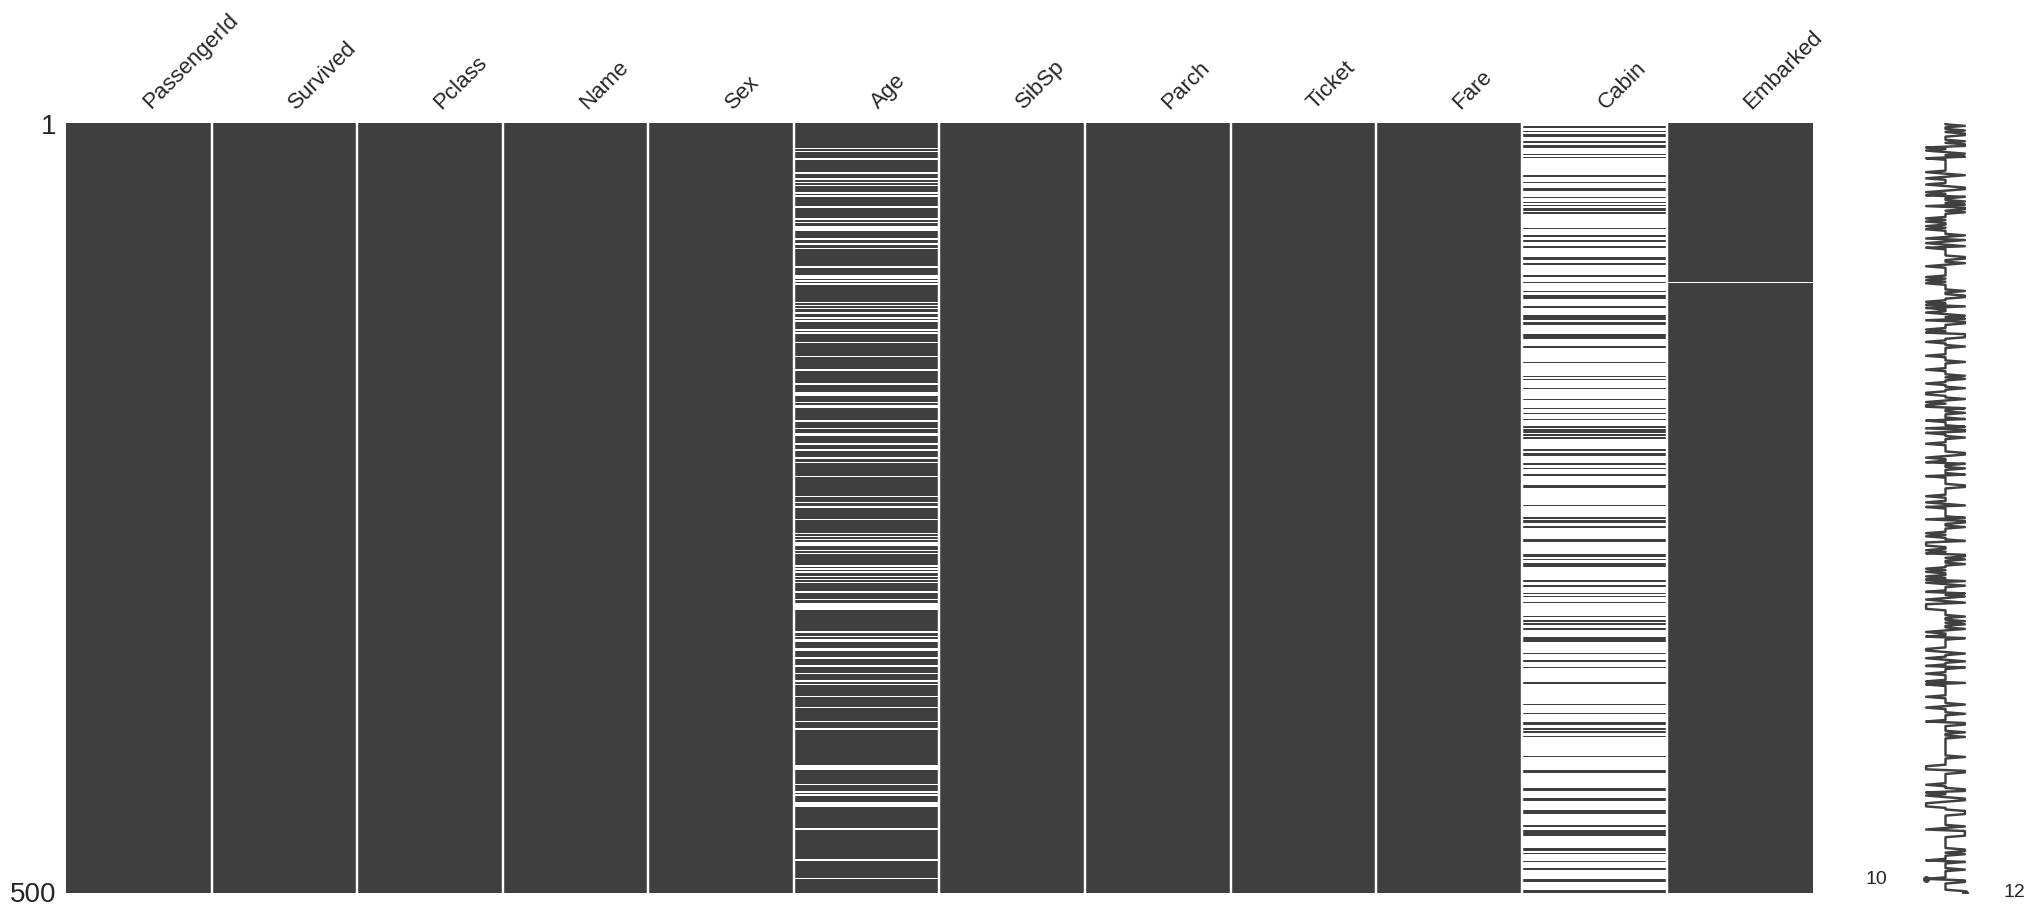

In [27]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))

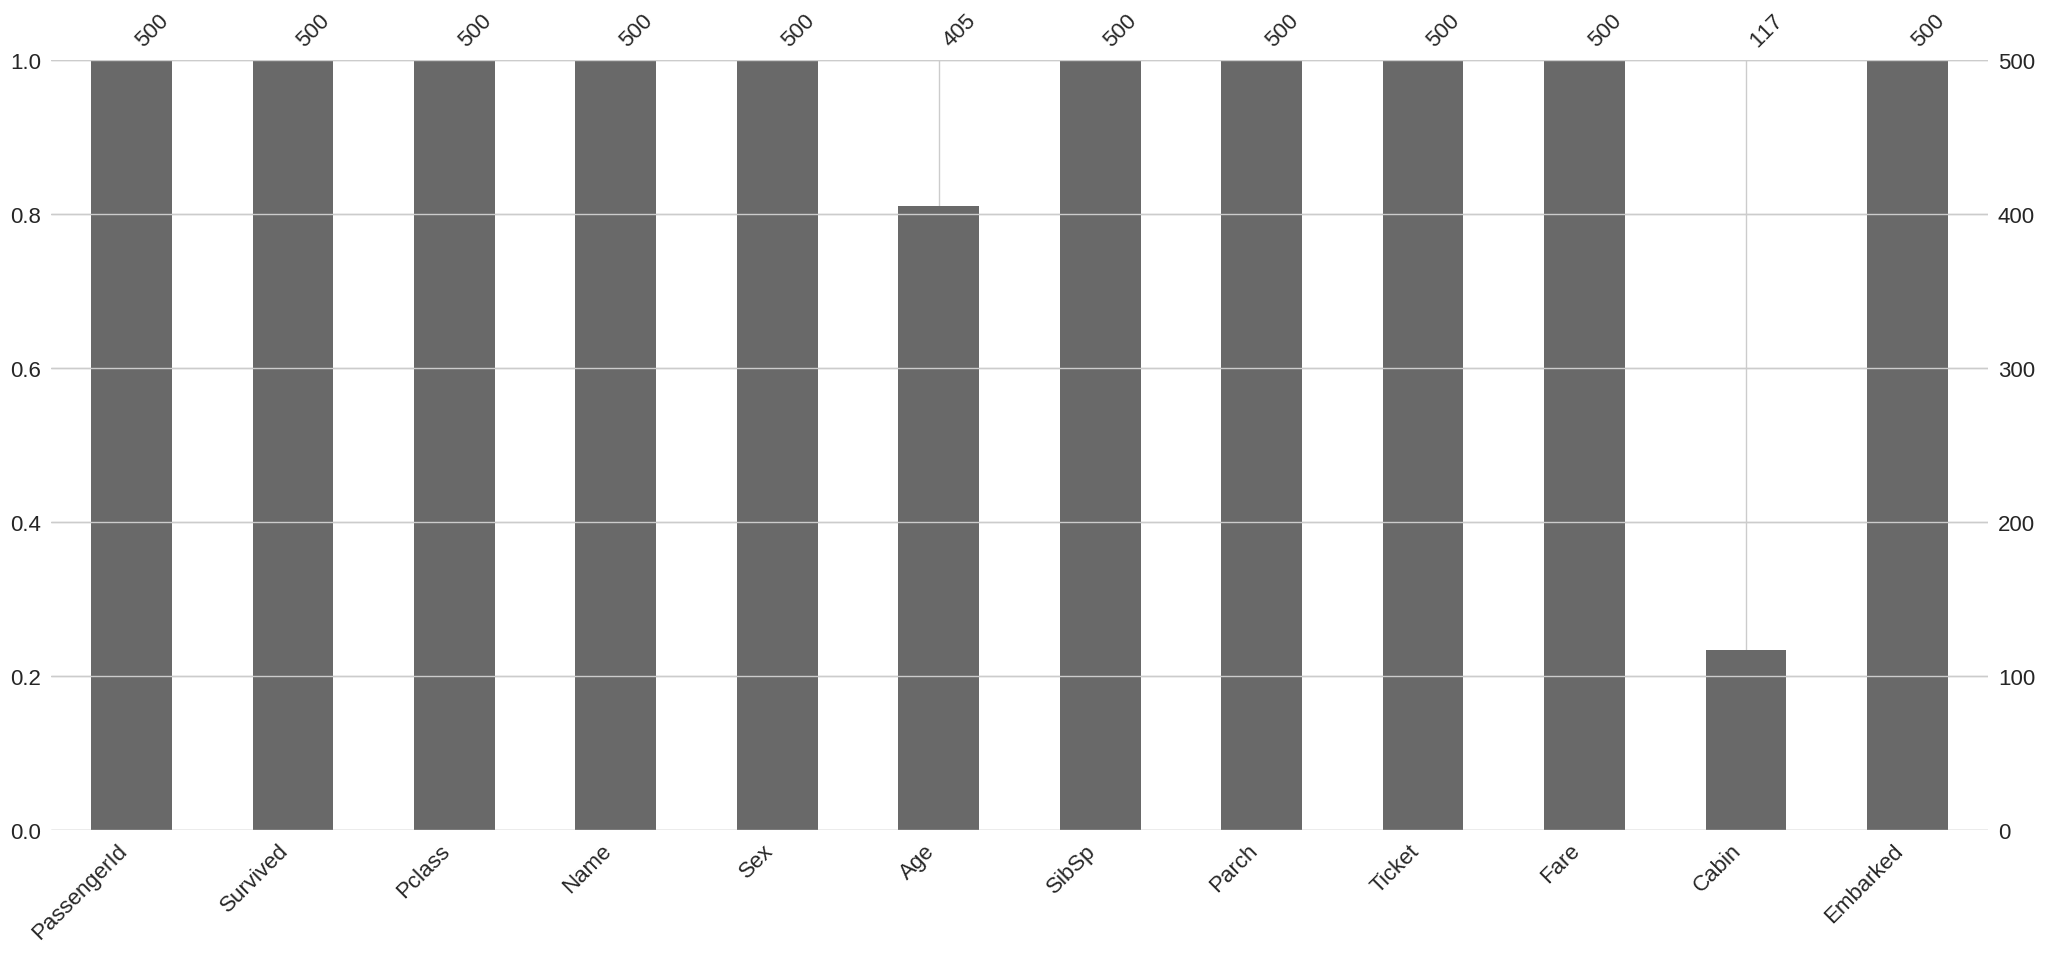

In [28]:
ax = msno.bar(orig_df.sample(500))

### Tratamento de dados nulos

In [29]:
df1 = orig_df.dropna(axis=1)
df1.shape, orig_df.shape

((891, 9), (891, 12))

**Imputando dados**

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
num_cols = orig_df.select_dtypes(
    include="number"
).columns

im = SimpleImputer()  # mean default
imputed = im.fit_transform(orig_df[num_cols])

Como alternativa também é possível usar fillna( ) para preencher as colunas vazias.

In [32]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

Essa função criar uma nova coluna com valores boleanos classificando dados nulos e não nulos em "Cabin", depois converte em 0 e 1. 

In [33]:
df1 = orig_df.assign(
    cabin_missing=add_indicator("Cabin")
)

In [34]:
df1.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  cabin_missing  
0      0         A/5 21171   7.2500   NaN        S              1  
1      0          PC 17599  71.2833   C85        C              0  
2      0  STON/O2. 3101282   7.9250   NaN        S              1

In [35]:
# verifica se há algum valor nulo no df

orig_df.isna().any().any()

True

In [36]:
df1.Cabin.isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [37]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from seaborn import pairplot

<Figure size 600x600 with 0 Axes>

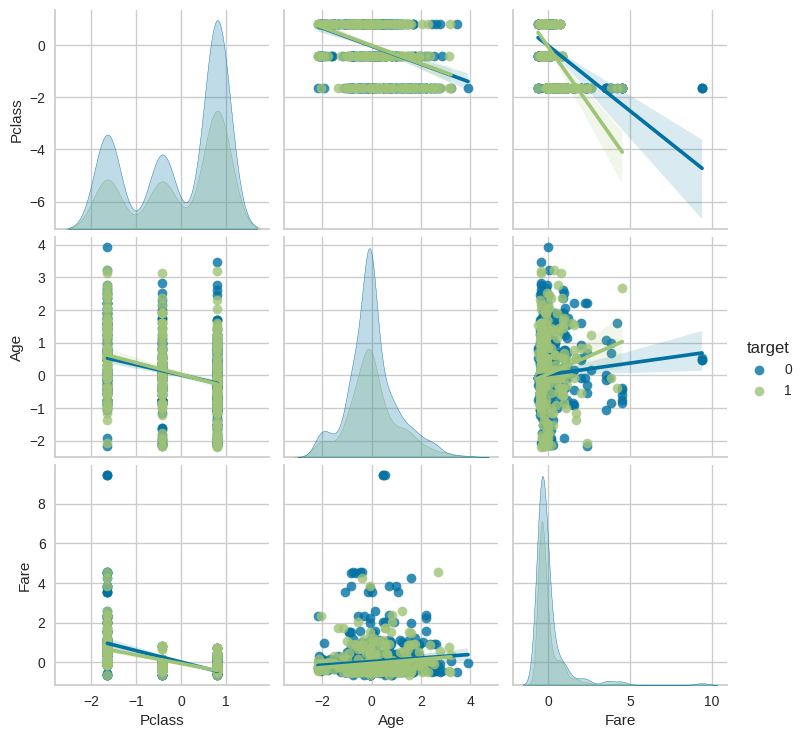

In [39]:
plt.figure(figsize=(6, 6))
new_df = X.copy()
new_df["target"] = y
vars = ["Pclass", "Age", "Fare"]
p = pairplot(
    new_df, vars=vars, hue="target", kind="reg"
)

In [40]:
from seaborn import boxplot

<Axes: xlabel='target', ylabel='Age'>

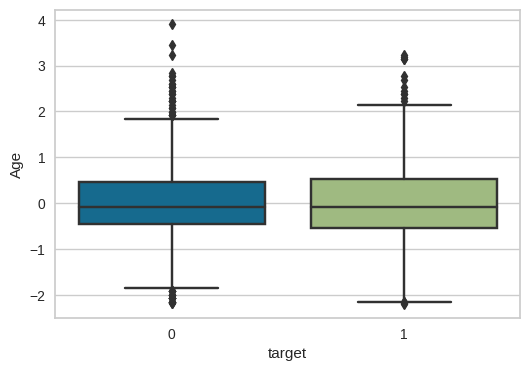

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
boxplot(x="target", y="Age", data=new_df)

In [42]:
from seaborn import violinplot

<Axes: xlabel='target', ylabel='Sex_male'>

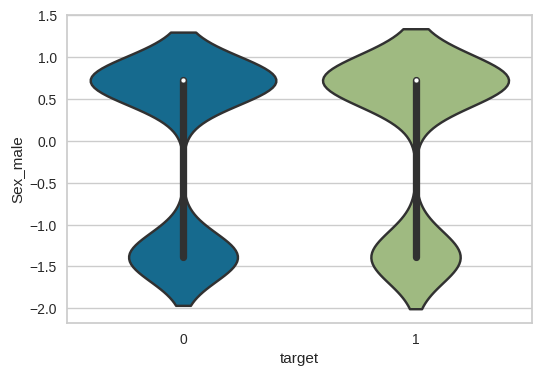

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
violinplot(
    x="target", y="Sex_male", data=new_df
)

**Correlações**

In [44]:
from yellowbrick.features import Rank2D

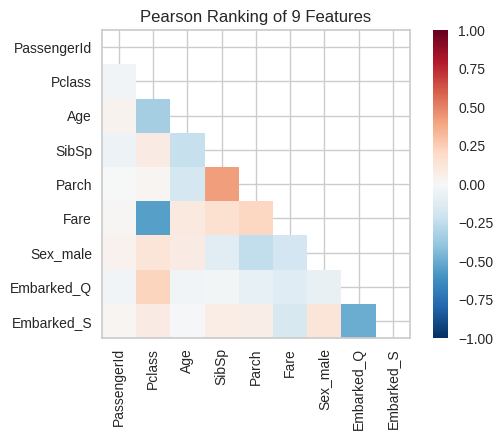

<Axes: title={'center': 'Pearson Ranking of 9 Features'}>

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))
pcv = Rank2D(
    features=X.columns, algorithm="pearson"
)
pcv.fit(X, y)
pcv.transform(X)
pcv.poof()

In [46]:
from seaborn import heatmap

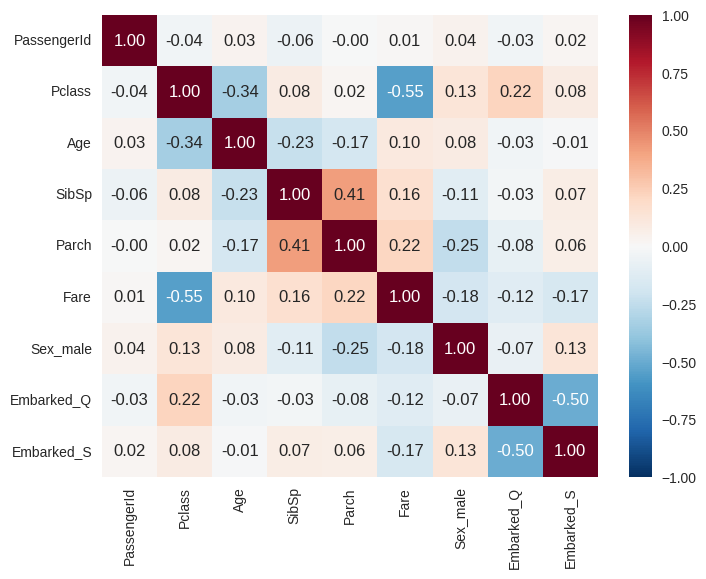

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = heatmap(
    X.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)

In [48]:
from yellowbrick.features import RadViz
#mostra quão separados e distribuidos estão os dados

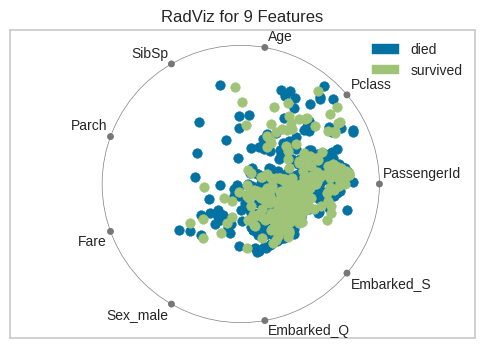

<Axes: title={'center': 'RadViz for 9 Features'}>

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))
rv = RadViz(
    classes=["died", "survived"],
    features=X.columns,
)
rv.fit(X, y)
_ = rv.transform(X)
rv.poof()

### Técnicas de seleção de atributos

**Pré-processamento**

In [50]:
from collections import Counter

In [51]:
c = Counter()
def triples(val):
    for i in range(len(val)):
        c[val[i : i + 3]] += 1
        
orig_df.Name.apply(triples)
c.most_common(10)

[(', M', 870),
 (' Mr', 642),
 ('r. ', 568),
 ('Mr.', 517),
 ('s. ', 309),
 ('n, ', 218),
 (' Mi', 197),
 ('iss', 183),
 ('ss.', 183),
 ('Mis', 182)]

In [52]:
orig_df.Name.str.extract(
    "([A-Za-z]+)\.", expand=False
).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

Abaixo, a codificação do título em relação à probabilidade média de sobrevivência. A codificação é um método de transformação de variáveis categóricas em numéricas. Para cada categoria, o valor da codificação é calculado a partir da média da variável alvo (no caso, "survived") para aquela categoria.

Por exemplo, se o título "Mr" tem uma probabilidade média de sobrevivência de 0,2 e o título "Mrs" tem uma probabilidade média de sobrevivência de 0,8, a codificação para "Mr" seria menor do que a codificação para "Mrs".

In [53]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.8 MB/s eta 0:00:00


In [54]:
def get_title(df):
    return df.Name.str.extract(
        "([A-Za-z]+)\.", expand=False)
    
te = ce.TargetEncoder(cols="Title")
te.fit_transform(
    orig_df.assign(Title=get_title), orig_df.Survived
)["Title"].head()

0    0.156673
1    0.791989
2    0.697802
3    0.791989
4    0.156673
Name: Title, dtype: float64

Abaixo, realiza um groupby e adiciona novas colunas com as médias e resultados gerais

In [55]:
agg = (
    orig_df.groupby("Cabin")
    .agg("min,max,mean,sum".split(","))
    .reset_index()
)
agg.columns = [
    "_".join(c).strip("_")
    for c in agg.columns.values
]
agg_df = orig_df.merge(agg, on="Cabin")

<ipython-input-55-6e3b5b35d461>:2: FutureWarning: ['Name', 'Sex', 'Ticket', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  orig_df.groupby("Cabin")


A função plot_dependence_heatmap do rfpimp é útil para visualizar a dependência de características em um contexto de modelagem preditiva. Por exemplo, pode ser usada para visualizar a dependência entre as características (ou variáveis) de entrada e a variável de saída (rótulo ou target) em um problema de aprendizado supervisionado. Isso pode ajudar a identificar quais características têm uma forte dependência com a variável de saída e, portanto, podem ser importantes para o modelo de aprendizado de máquina, e quais características têm uma dependência mais fraca e podem ser menos relevantes.

In [56]:
!pip install rfpimp
import rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=6e706df192801f623e449221dabc76fdc3a1f9068fcbd82494475af31f040a98
  Stored in directory: /root/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


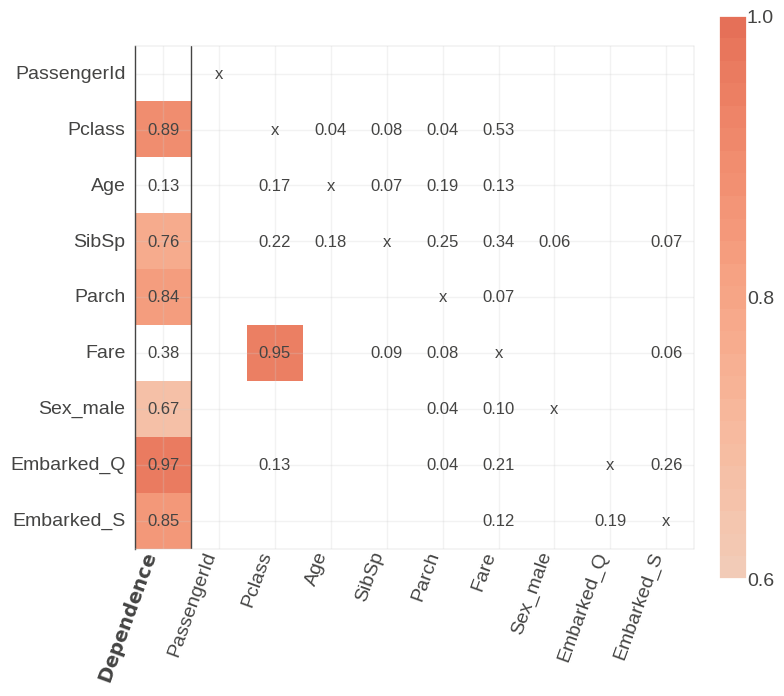

In [57]:
rfpimp.plot_dependence_heatmap(
    rfpimp.feature_dependence_matrix(X_train),
    value_fontsize=12,
    label_fontsize=14,
    figsize=(8, 8)
)
fig = plt.gcf()

A RFECV é uma técnica de seleção de features recursiva, o que significa que ela começa com um conjunto completo de features e, em seguida, elimina uma a uma as features menos importantes com base em um algoritmo de aprendizado de máquina treinado. Em seguida, o processo é repetido em um loop, onde as features menos importantes são eliminadas até que o número desejado de features seja alcançado ou até que todas as features tenham sido eliminadas.

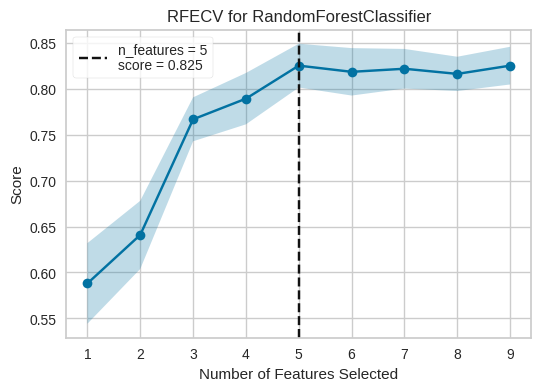

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [58]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    ensemble.RandomForestClassifier(
        n_estimators=100
    ),
    cv=5,
)
rfe.fit(X, y)
rfe.rfe_estimator_.ranking_
rfe.rfe_estimator_.n_features_
rfe.rfe_estimator_.support_
rfe.poof()

In [59]:
from sklearn.feature_selection import RFE
model = ensemble.RandomForestClassifier(
    n_estimators=100
)
rfe = RFE(model, n_features_to_select= 5)
rfe.fit(X, y)
X.columns[rfe.support_]

Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Sex_male'], dtype='object')

<Axes: ylabel='feature'>

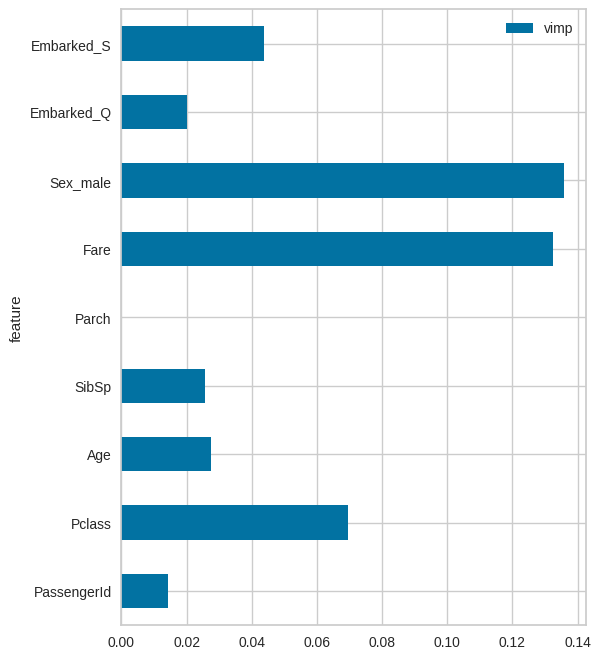

In [60]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
    X, y
)
fig, ax = plt.subplots(figsize=(6, 8))
(
    pd.DataFrame(
        {"feature": X.columns, "vimp": mic}
    )
    .set_index("feature")
    .plot.barh(ax=ax)
)

### Balanceamento e análises

**Classes desbalanceadas**

In [61]:
from imblearn.over_sampling import (
    RandomOverSampler,
)
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
pd.Series(y_ros).value_counts()

1    549
0    549
Name: Survived, dtype: int64

**Visualizações úteis**

In [62]:
from yellowbrick.model_selection import ValidationCurve

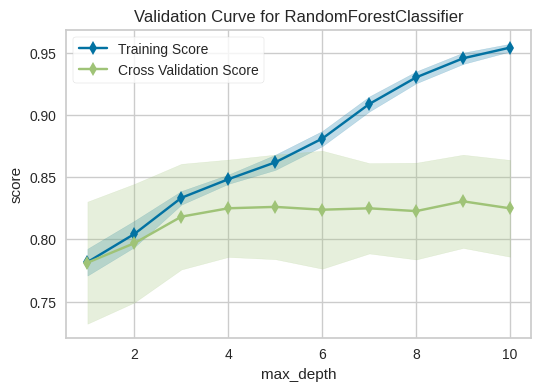

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100),
    param_name="max_depth",
    param_range=np.arange(1, 11),
    cv=10,
    n_jobs=-1,
)
vc_viz.fit(X, y)
vc_viz.poof()

Avalia se a inserção de mais dados melhora o aprendizado

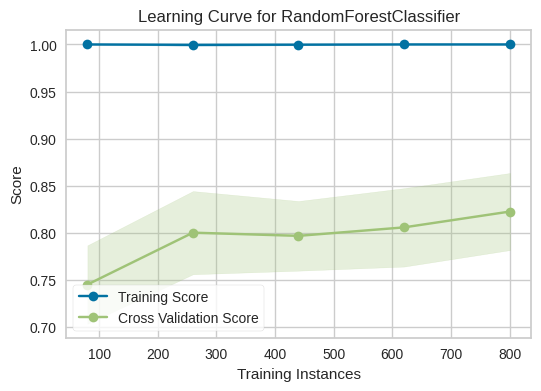

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [64]:
from yellowbrick.model_selection import (
    LearningCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100),
    cv=10,
)
lc3_viz.fit(X, y)
lc3_viz.poof()

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


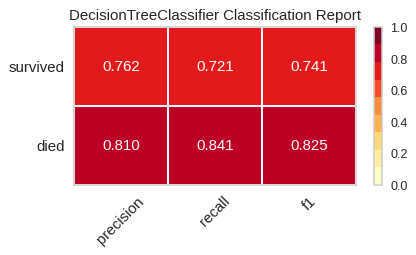

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [66]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ( ClassificationReport )

mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(5, 3), dpi=(90))
cm_viz = ClassificationReport(
    dt,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

In [67]:
from sklearn.metrics import roc_auc_score
y_predict = dt.predict(X_test)
roc_auc_score(y_test, y_predict)

0.7807425259654559

0.6785593643984615


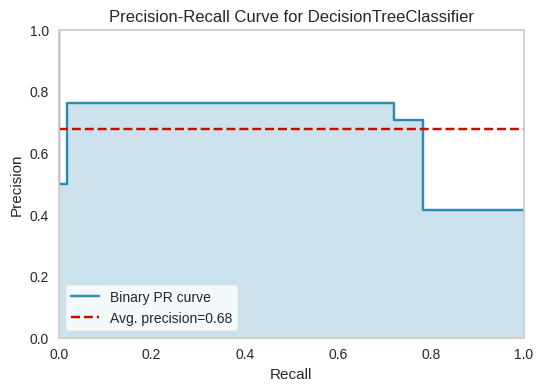

<Axes: title={'center': 'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [68]:
from yellowbrick.classifier import PrecisionRecallCurve 

fig, ax = plt.subplots(figsize=(6, 4))
viz = PrecisionRecallCurve(
    DecisionTreeClassifier(max_depth=3)
)
viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof()

In [69]:
!pip install scikit-plot
!conda install -c conda-forge scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

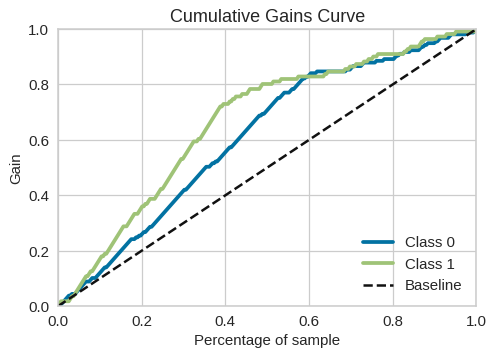

In [70]:
import scikitplot as skplt

fig, ax = plt.subplots(figsize=(6, 4), dpi=(90))
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, ax=ax
)

/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


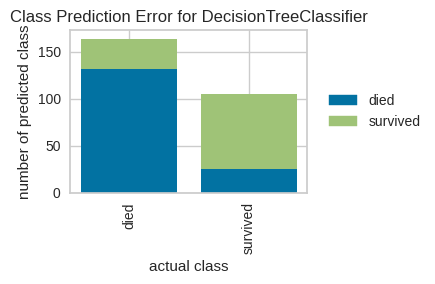

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [71]:
from yellowbrick.classifier import (
    ClassPredictionError,
)
fig, ax = plt.subplots(figsize=(5, 3), dpi=(100))
cpe_viz = ClassPredictionError(
    dt, classes=["died", "survived"]
)
cpe_viz.score(X_test, y_test)
cpe_viz.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


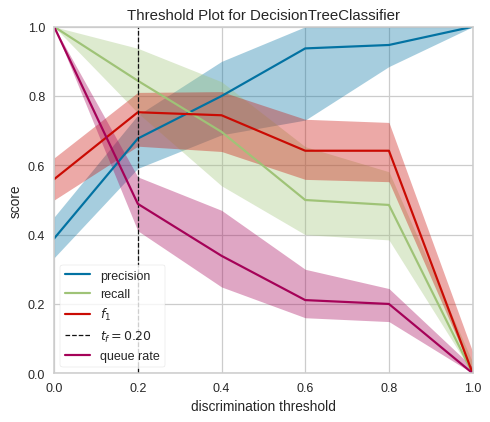

<Axes: title={'center': 'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [72]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)
fig, ax = plt.subplots(figsize=(6, 5), dpi=(90))
dt_viz = DiscriminationThreshold(dt)
dt_viz.fit(X, y)
dt_viz.poof()

In [80]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=["died", "survived"],
)
exp = explainer.explain_instance(
    X_train.iloc[-1].values, dt.predict_proba
)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Figure size 360x360 with 0 Axes>

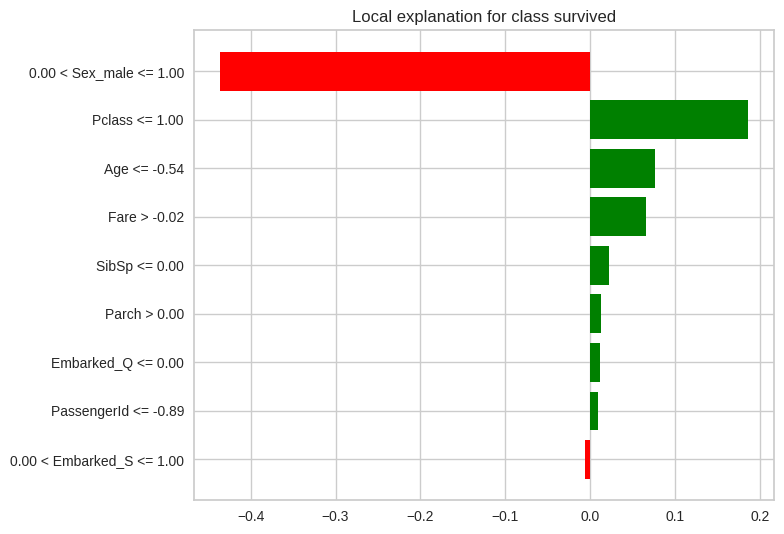

In [77]:
plt.figure(figsize=(4,4), dpi=(90))
fig = exp.as_pyplot_figure()
fig.tight_layout()

**Modelos substitutos**

In [76]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)
sur_dt = tree.DecisionTreeClassifier()
sur_dt.fit(X_test, sv.predict(X_test))
for col, val in sorted(
    zip(
        X_test.columns,
        sur_dt.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:7]:
    print(f"{col:10}{val:10.3f}")

Sex_male       0.774
Age            0.100
Parch          0.056
PassengerId     0.030
Fare           0.020
Pclass         0.010
SibSp          0.010
